In [2]:
import pandas as pd
import numpy as np
games = pd.read_csv('Games_Split.csv') 


In [145]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29346 entries, 0 to 29345
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   evals               29346 non-null  object 
 1   cheating_pos        29346 non-null  object 
 2   cheating            29346 non-null  bool   
 3   cheating_magnitude  29346 non-null  float64
dtypes: bool(1), float64(1), object(2)
memory usage: 716.6+ KB


In [3]:
import ast
evals = games['evals'].to_list()
cheating_pos = games['cheating_pos'].to_list()
cheating_magnitudes = games['cheating_magnitude'].to_list()
evals = [ast.literal_eval(evals[i]) for i in range(len(evals))]
cheating_pos = [ast.literal_eval(cheating_pos[i]) for i in range(len(cheating_pos))]
cheating = games['cheating'].to_list()

In [172]:
print(22/(22+7))

0.7586206896551724


In [143]:
cheating_counts = games['cheating'].value_counts()
print(cheating_counts)

cheating
False    22346
True      7000
Name: count, dtype: int64


In [122]:
import numpy as np

import matplotlib.pyplot as plt

def plot_evals_with_anomalies(evals, cheating_pos):
    """
    Plotea los valores de evals y resalta las anomalías indicadas por cheating.

    Args:
        evals (list or np.ndarray): Valores numéricos a graficar.
        cheating (list or np.ndarray): Vector binario que indica anomalías (1 para anomalía, 0 para normal).
    """
    evals = np.array(evals)
    cheating_pos = np.array(cheating_pos)

    plt.figure(figsize=(12, 6))
    plt.plot(evals, label='Evals', color='blue')

    # Resaltar las anomalías
    for i in range(len(cheating_pos)):
        if cheating_pos[i] == 1:
            plt.axvspan(i - 0.5, i + 0.5, color='red', alpha=0.3)

    plt.xlabel('Index')
    plt.ylabel('Evals')
    plt.title('Evals with Anomalies Highlighted')
    plt.legend()
    plt.grid(True)
    plt.show()

In [82]:
cheating_pos[16001]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

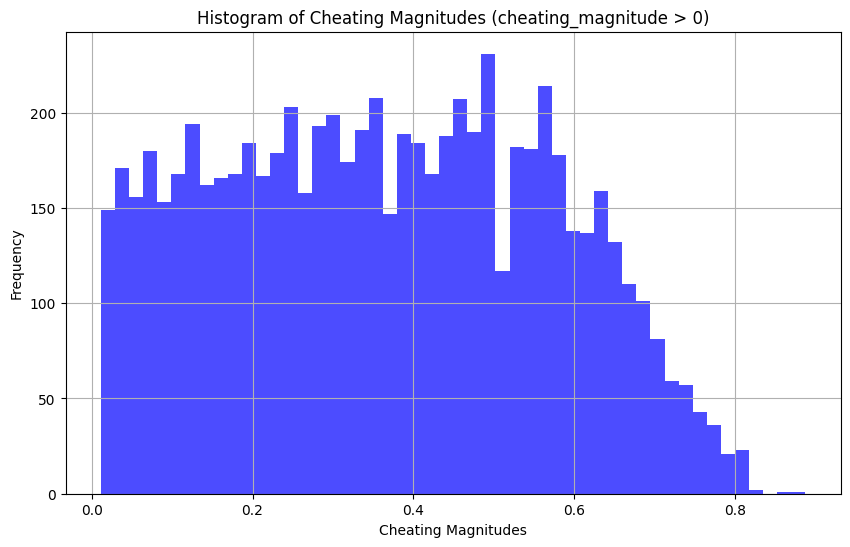

In [139]:
plt.figure(figsize=(10, 6))
plt.hist([m for m in cheating_magnitudes if m > 0], bins=50, color='blue', alpha=0.7)
plt.xlabel('Cheating Magnitudes')
plt.ylabel('Frequency')
plt.title('Histogram of Cheating Magnitudes (cheating_magnitude > 0)')
plt.grid(True)
plt.show()

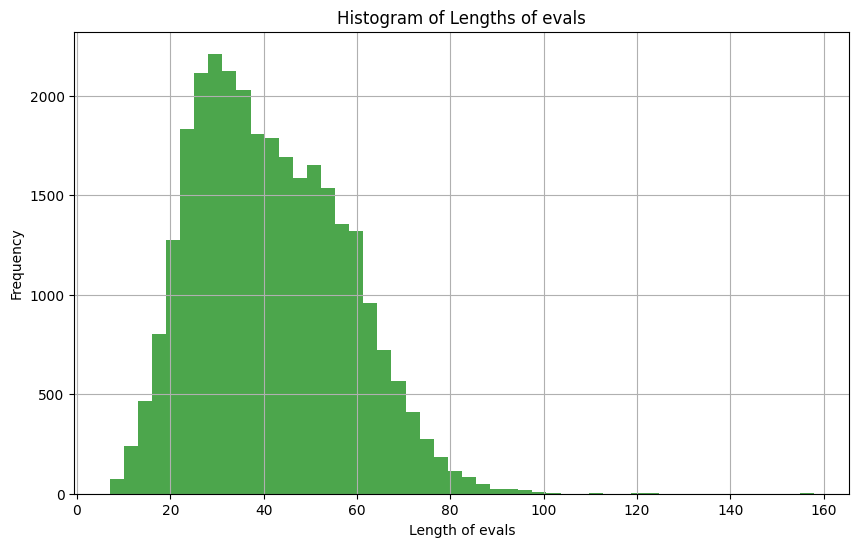

In [140]:
eval_lengths = [len(e) for e in evals]

plt.figure(figsize=(10, 6))
plt.hist(eval_lengths, bins=50, color='green', alpha=0.7)
plt.xlabel('Length of evals')
plt.ylabel('Frequency')
plt.title('Histogram of Lengths of evals')
plt.grid(True)
plt.show()

i:  16656
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
60
60
cheating_magnitude:  0.0327868852459016


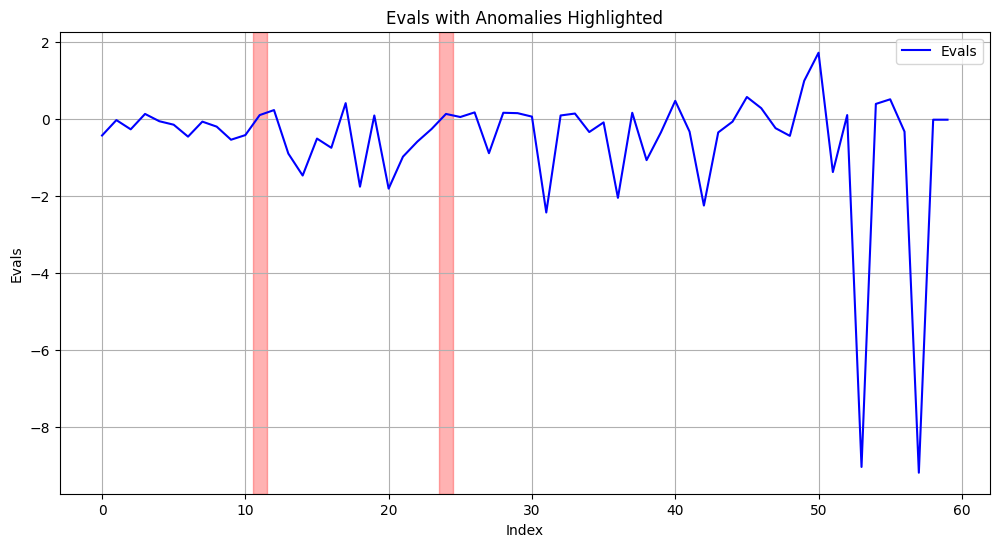

In [151]:
indices = games[games['cheating_magnitude'] > 0].index.tolist()
i = indices[655]
print("i: ", i)
print(cheating_pos[i])
print(len(evals[i]))
print(len(cheating_pos[i]))
print("cheating_magnitude: ", cheating_magnitudes[i])
plot_evals_with_anomalies(evals[i], cheating_pos[i])

In [6]:


def pad_sequences_last_value(sequences, maxlen=None, padding='post'):
    """
    Pads sequences to the same length, filling with the last value of each sequence.
    
    Parameters:
    - sequences: List of lists of integers or floats. The sequences to pad.
    - maxlen: The maximum length of the padded sequences. If None, it will pad to the length
              of the longest sequence in the input.
    - padding: 'pre' or 'post'. If 'pre', pads at the beginning of the sequences.
               If 'post', pads at the end of the sequences.
    
    Returns:
    - Padded sequences as a numpy array.
    """
    # Get the maximum length of sequences if maxlen is not specified
    if maxlen is None:
        maxlen = max(len(seq) for seq in sequences)
    
    # Initialize an empty list for the padded sequences
    padded_sequences = []
    
    for seq in sequences:
        # Truncate if the sequence is longer than maxlen
        if len(seq) > maxlen:
            padded_seq = seq[:maxlen]
        elif len(seq) < maxlen:
            # Ensure we are padding to the right or left as needed
            padding_length = maxlen - len(seq)
            if padding == 'post':
                padded_seq = seq + [seq[-1]] * padding_length
            elif padding == 'pre':
                padded_seq = [seq[0]] * padding_length + seq
        else:
            padded_seq = seq
        
        padded_sequences.append(padded_seq)
    
    return np.array(padded_sequences, dtype=np.float32)



In [15]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((20542, 100), (20542,), (2993, 100), (2993,))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler, StandardScaler

max_len = 100
X = pad_sequences(evals, maxlen=max_len, padding='post', truncating='post',  dtype='float32')
X = np.tanh(X)  # Apply tanh activation function to the padded sequences
y = np.array(cheating)  
np.save('X.npy', X)
np.save('y.npy', y)


# Split the data into train, validation, and test sets (70%, 10%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.66, random_state=42)

# scaler = StandardScaler()
# xtrain.shape = (n_samples, n_features)
# X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
# X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
# X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)


# Calculate class weights based on the training set
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create a dictionary for the class weights
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Define a simple dense model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Assuming X_train has shape (n_samples, n_features)
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification (cheating vs not)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the training set with class weights
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), 
                    class_weight=class_weight_dict, verbose=1)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.90).astype(int)  # Apply threshold of 0.5 to get the final prediction

# Print the classification report for test set
print(classification_report(y_test, y_pred))


Epoch 1/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6715 - loss: 0.6343 - val_accuracy: 0.7167 - val_loss: 0.5903
Epoch 2/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7228 - loss: 0.5836 - val_accuracy: 0.7521 - val_loss: 0.5588
Epoch 3/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7310 - loss: 0.5710 - val_accuracy: 0.7284 - val_loss: 0.5839
Epoch 4/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7374 - loss: 0.5504 - val_accuracy: 0.7534 - val_loss: 0.5443
Epoch 5/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7515 - loss: 0.5347 - val_accuracy: 0.6782 - val_loss: 0.6245
Epoch 6/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7654 - loss: 0.5081 - val_accuracy: 0.7097 - val_loss: 0.5994
Epoch 7/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7809 - loss: 0.4813 - val_accuracy: 0.6826 - val_loss: 0.6365
Epoch 8/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7857 - loss: 0.4629 - val_accuracy: 0.

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step


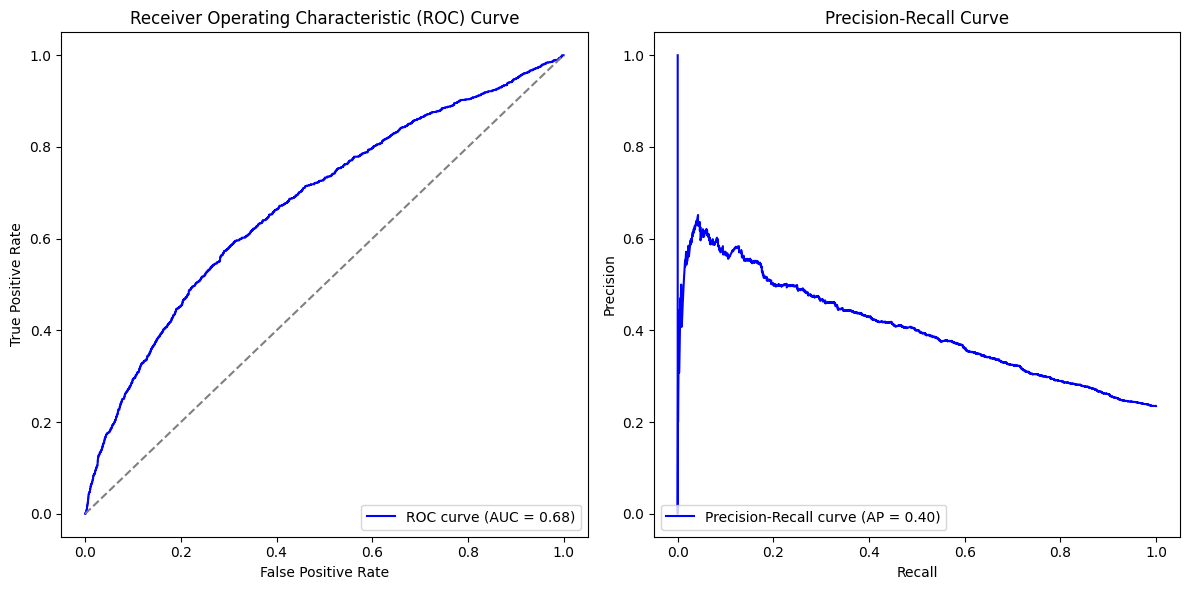

c:\Users\yoyom\OneDrive\Escritorio\AE\Programacion\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


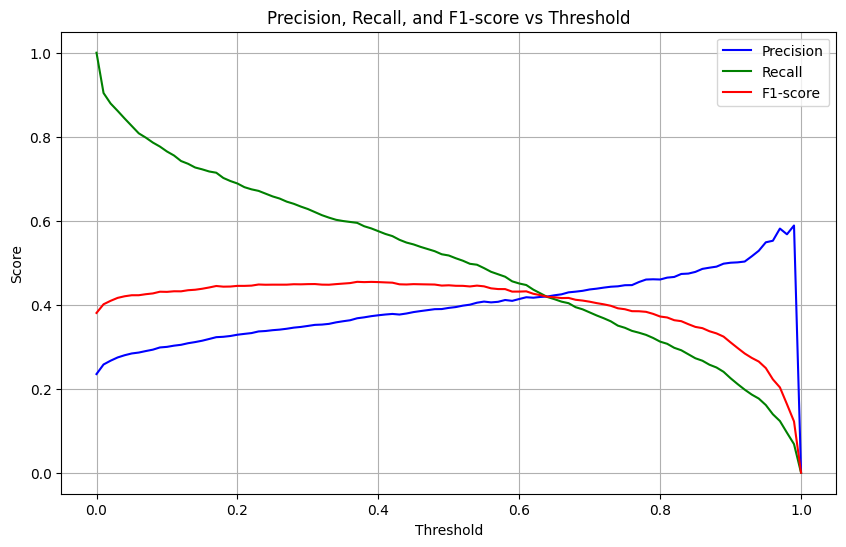

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Obtener las probabilidades de predicción del modelo en el conjunto de prueba
y_pred_prob = model.predict(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calcular la curva de Precisión-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Graficar la Curva ROC
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Graficar la Curva de Precisión-Recall
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


from sklearn.metrics import precision_score, recall_score, f1_score

# Umbrales a evaluar
thresholds_roc = np.linspace(0, 1, 101)

# Listas para almacenar los resultados
precisions = []
recalls = []
f1_scores = []

# Iterar sobre los diferentes umbrales
for threshold in thresholds_roc:
    y_pred = (y_pred_prob >= threshold).astype(int)
    
    # Calcular precision, recall y f1-score usando sklearn
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Guardar los valores
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Graficar las métricas en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds_roc, precisions, color='blue', label='Precision')
plt.plot(thresholds_roc, recalls, color='green', label='Recall')
plt.plot(thresholds_roc, f1_scores, color='red', label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# to do: inverse model